In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import wrangle

from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

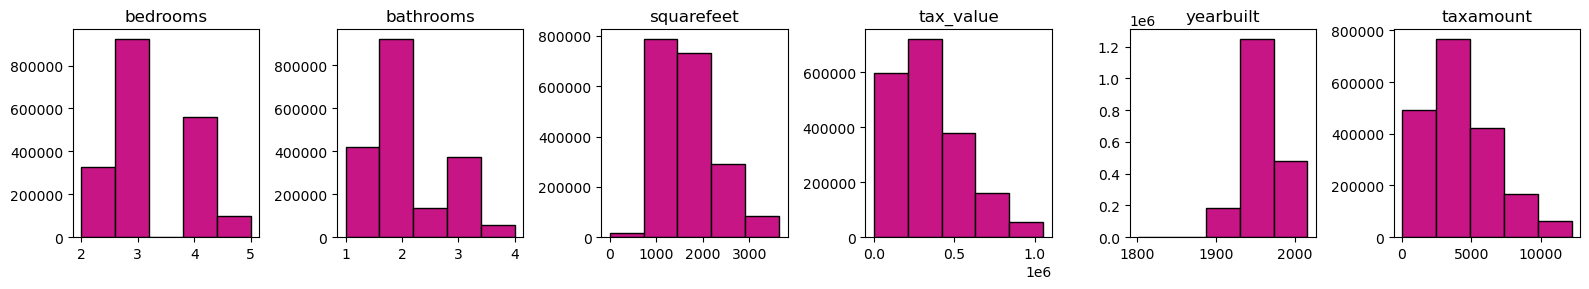

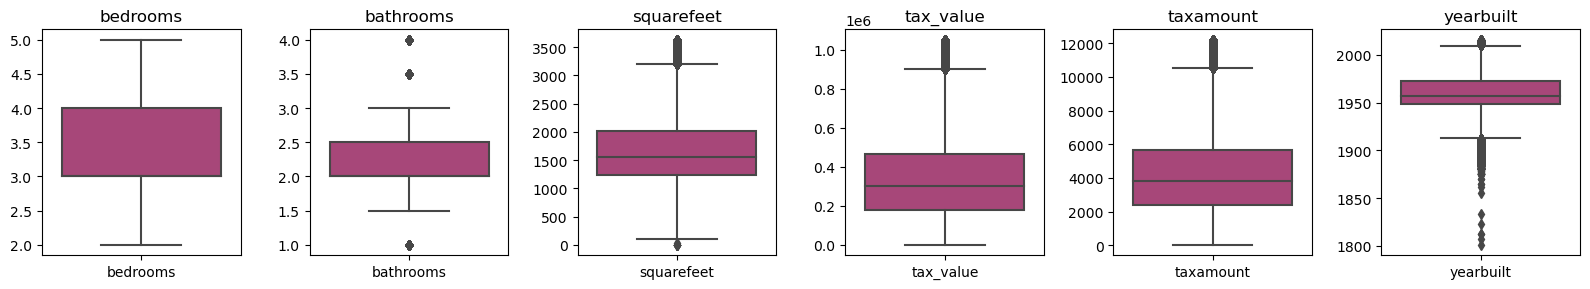

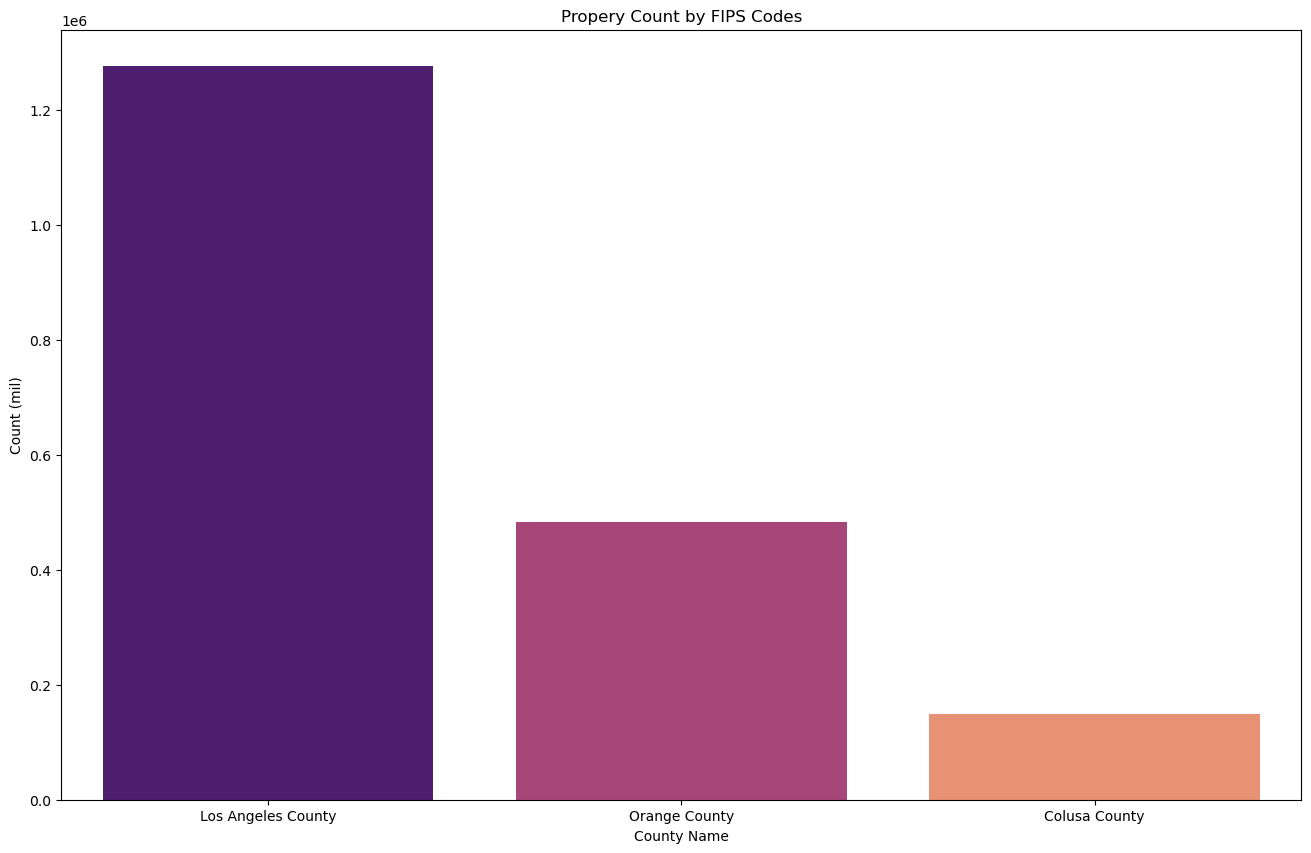

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [10]:
columns = ['bedrooms', 'bathrooms', 'squarefeet', 'yearbuilt', 'taxamount']
columns

['bedrooms', 'bathrooms', 'squarefeet', 'yearbuilt', 'taxamount']

In [11]:
x_train = train[columns]
x_val = validate[columns]
x_test = test[columns]
x_train.columns

Index(['bedrooms', 'bathrooms', 'squarefeet', 'yearbuilt', 'taxamount'], dtype='object')

In [6]:
y_train = train['tax_value']
y_val = validate['tax_value']
y_test = test['tax_value']

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068268 entries, 1162651 to 505987
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bedrooms        1068268 non-null  float64
 1   bathrooms       1068268 non-null  float64
 2   squarefeet      1068268 non-null  float64
 3   tax_value       1068268 non-null  float64
 4   yearbuilt       1068268 non-null  float64
 5   taxamount       1068268 non-null  float64
 6   fips            1068268 non-null  int64  
 7   propertytypeid  1068268 non-null  int64  
 8   fips_location   1068268 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 81.5+ MB


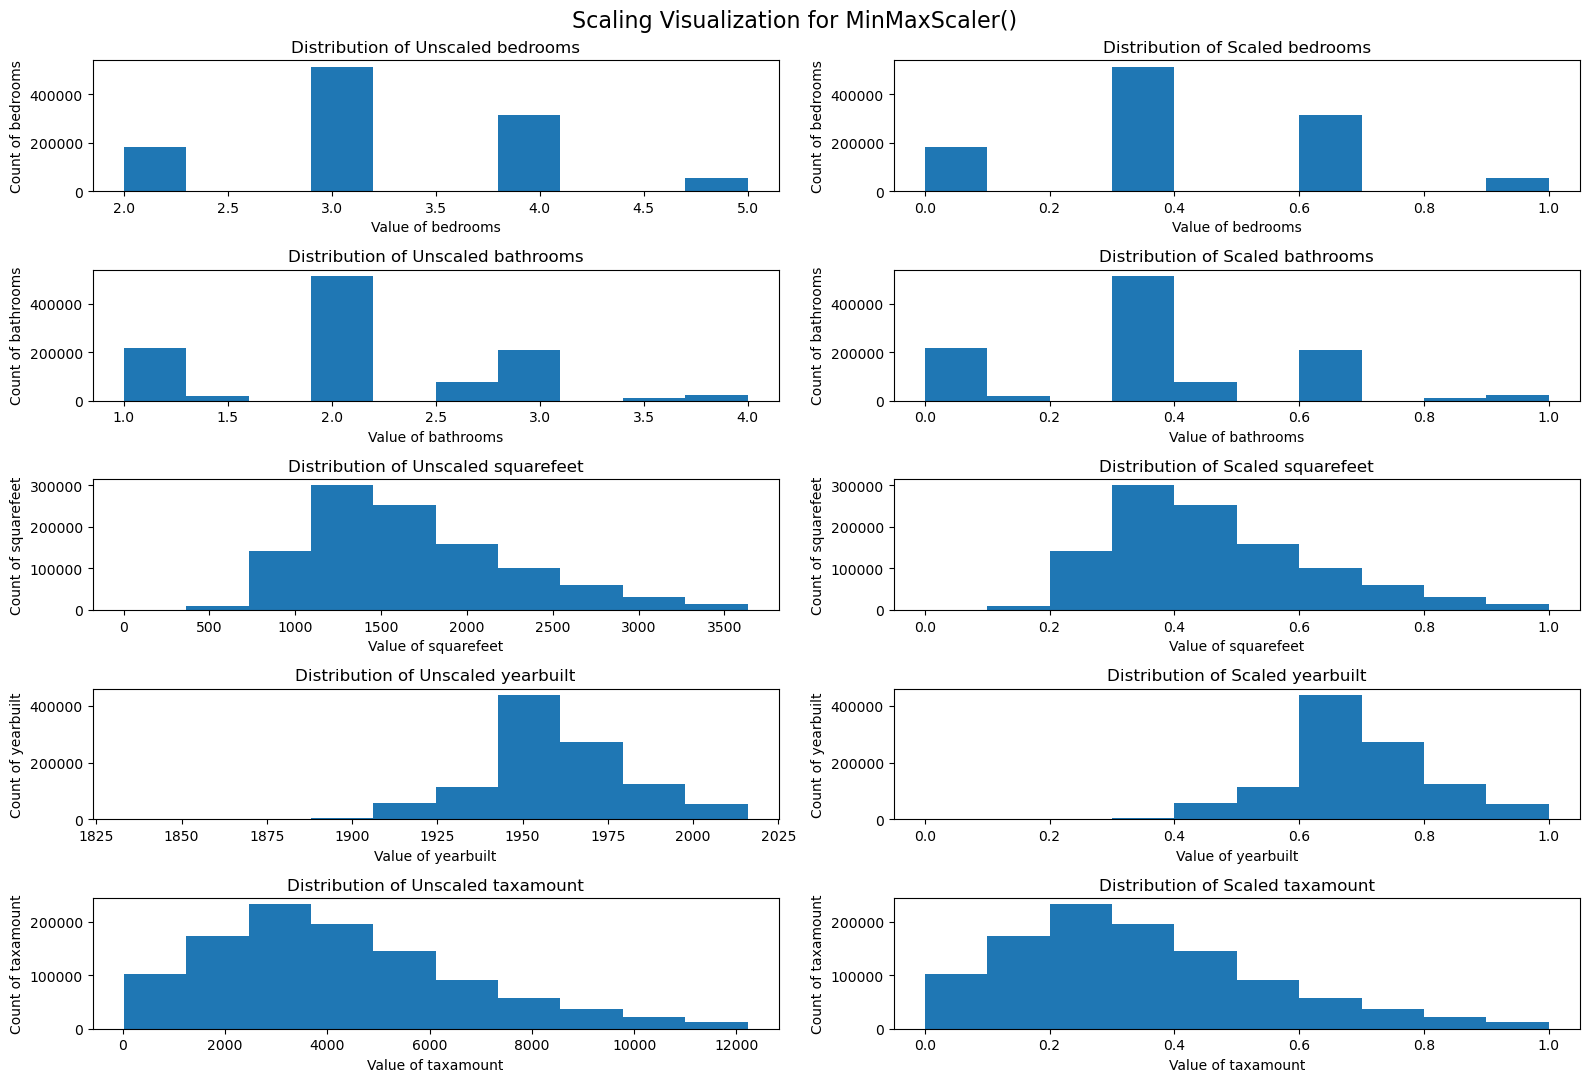

In [12]:
wrangle.scale_and_vis(MinMaxScaler(), x_train, columns)

In [24]:
zillow_corr = train.drop(columns={'fips_location', 'propertytypeid', 'fips'}).corr()

<AxesSubplot:>

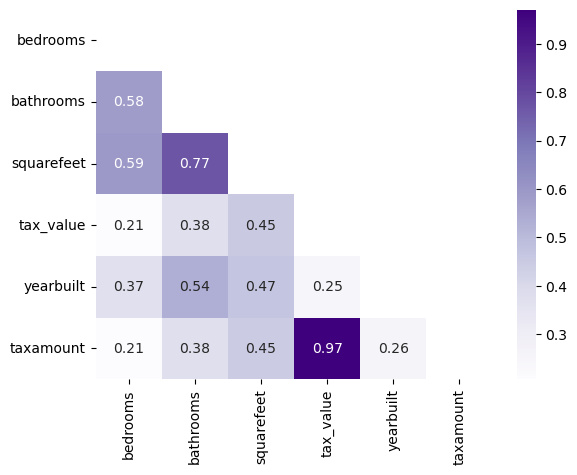

In [26]:
sns.heatmap(zillow_corr, cmap='Purples', annot=True, mask=np.triu(zillow_corr))

H$_0$: There is no correlation between tax_value (target) and taxamount.

H$_A$: There is correlation between tax_value and taxamount.

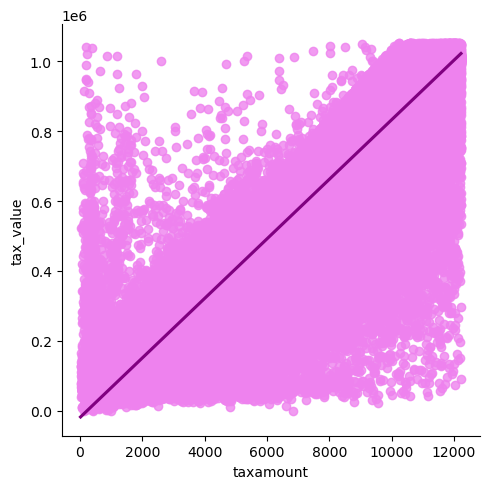

In [38]:
sns.lmplot(data=train, 
          x='taxamount', 
          y='tax_value', scatter_kws={'color': 'violet'},
          line_kws={'color': 'purple'})

Lets conduct a stats test!

In [35]:
r, p = stats.pearsonr(train['taxamount'], train['tax_value'])

In [39]:
α = 0.05

In [41]:
if p < α:
    print('we can reject the null hypothesis.')

we can reject the null hypothesis.


H$_0$: There is no correlation between tax_value (target) and squarefeet.

H$_A$: There is correlation between tax_value and squarefeet.

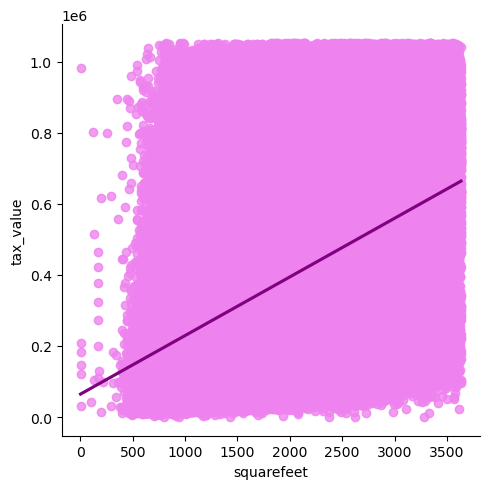

In [42]:
sns.lmplot(data=train, 
          x='squarefeet', 
          y='tax_value', scatter_kws={'color': 'violet'},
          line_kws={'color': 'purple'})

In [43]:
r, p = stats.pearsonr(train['squarefeet'], train['tax_value'])

In [44]:
if p < α:
    print('we can reject the null hypothesis.')

we can reject the null hypothesis.


Takeaways:  We can say with some confidence that there is a linear relationship between squarefeet and tax value.

We can also say with some confidence that there is a linear relationship between tax amount and tax value.


In [50]:
la_co = train[train.fips_location == 'Los Angeles County']
or_co = train[train.fips_location == 'Orange County']
co_co = train[train.fips_location == 'Colusa County']

In [45]:
train.head()

,bedrooms,bathrooms,squarefeet,tax_value,yearbuilt,taxamount,fips,propertytypeid,fips_location
1162651,3.0,2.0,1537.0,202000.0,2008.0,3410.01,6037,261,Los Angeles County
782265,3.0,3.0,1780.0,533026.0,1958.0,6415.11,6037,261,Los Angeles County
405503,4.0,2.0,1839.0,358975.0,1981.0,4575.06,6037,261,Los Angeles County
1028626,4.0,2.0,1756.0,543158.0,1950.0,6721.89,6037,261,Los Angeles County
1802146,3.0,2.0,1212.0,331065.0,1958.0,3610.64,6037,261,Los Angeles County


In [47]:
train.fips_location.value_counts()

Los Angeles County    714081
Orange County         271234
Colusa County          82953
Name: fips_location, dtype: int64

H$_0$: There is no difference is the means of tax_value (target) between the three different counties.

H$_A$: There is a difference is the means of tax_value (target) between the three different counties.

In [ ]:
# checking for variance

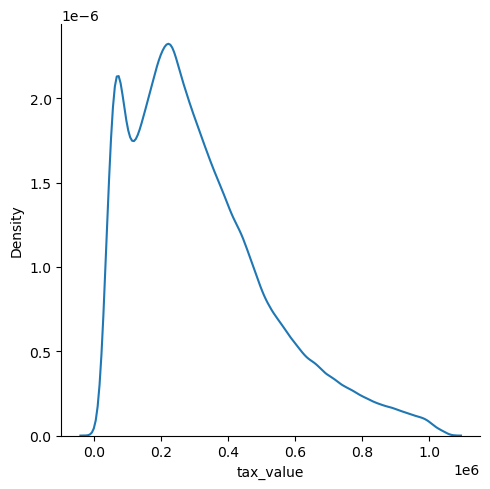

In [63]:
sns.displot(la_co, x='tax_value', kind='kde')

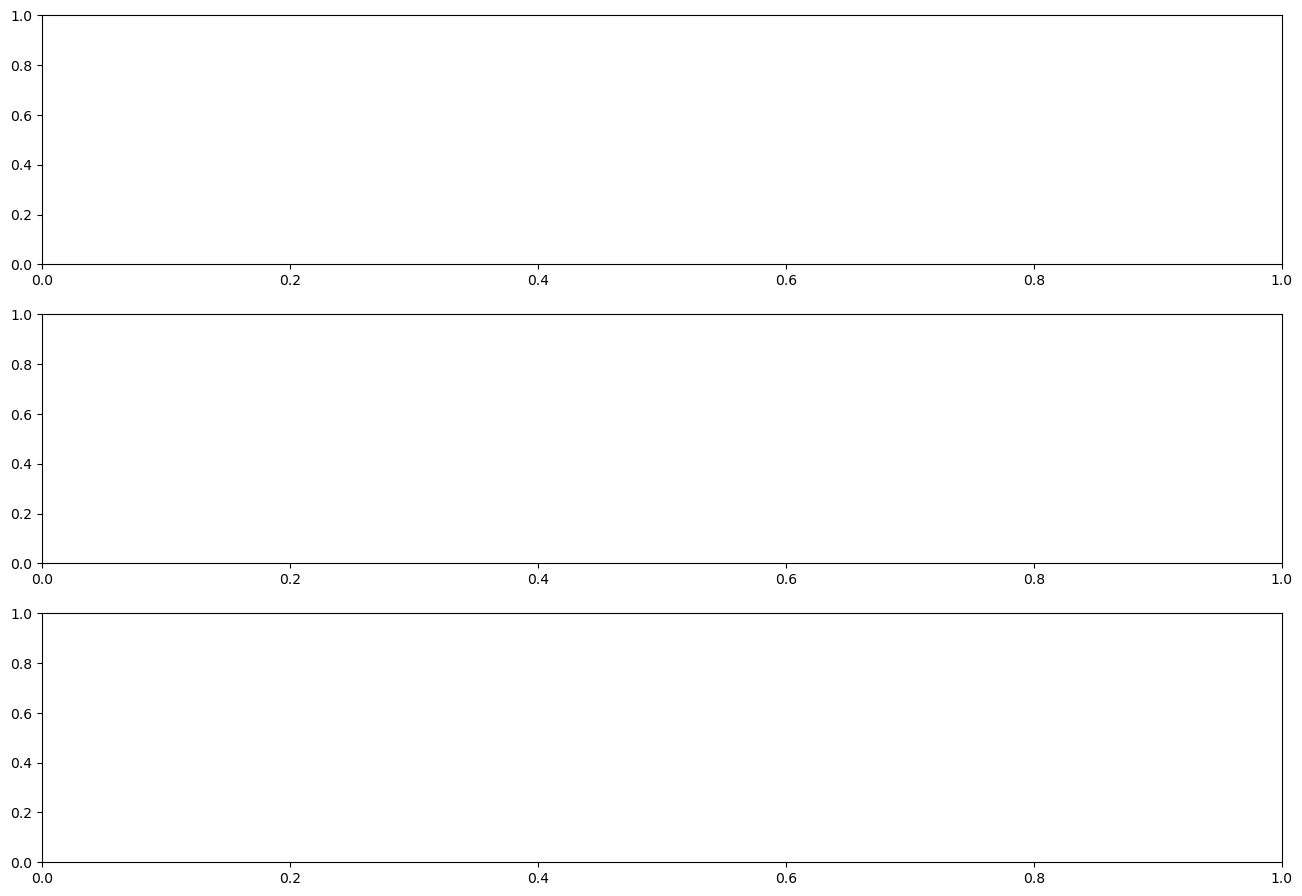

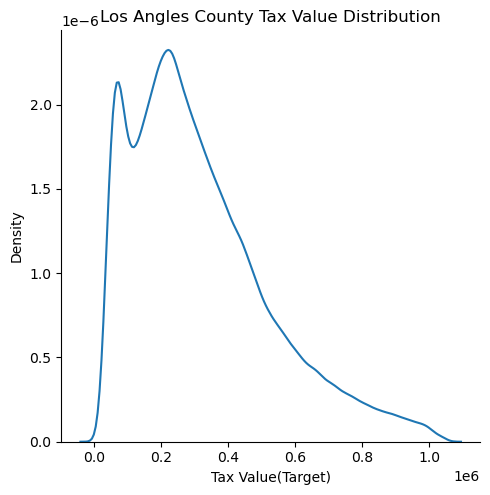

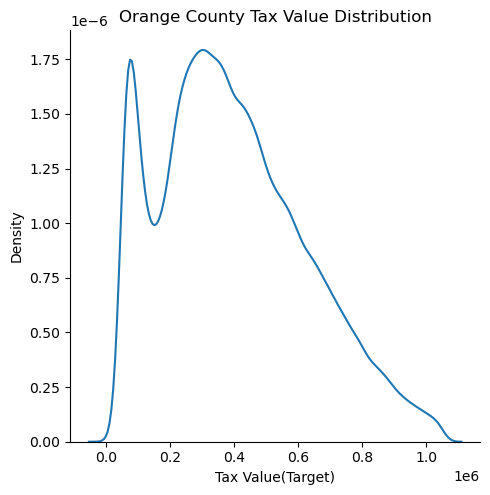

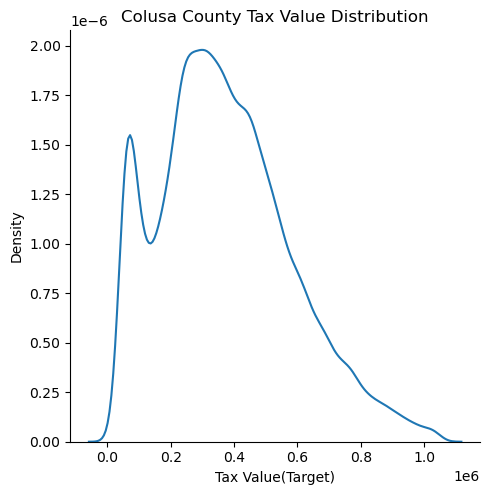

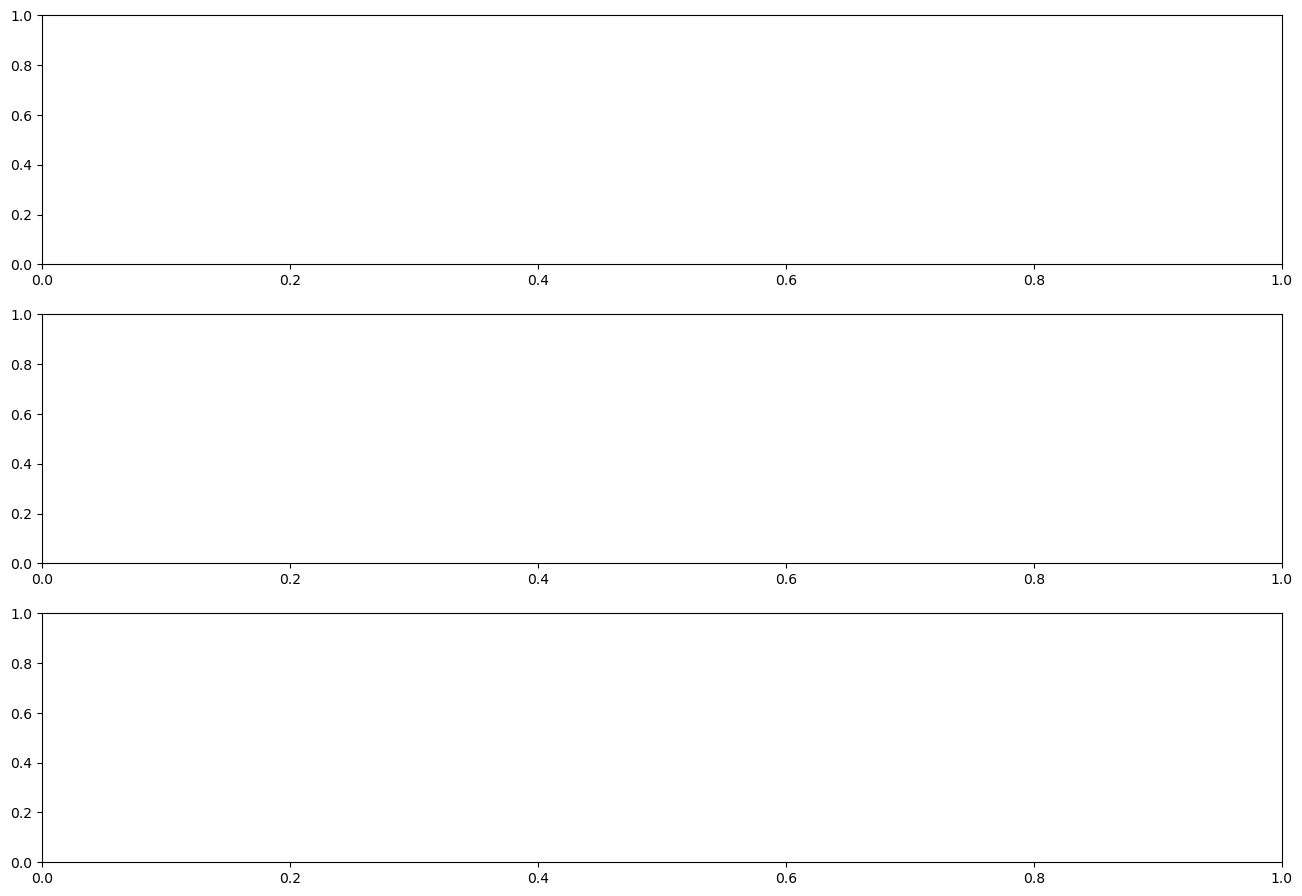

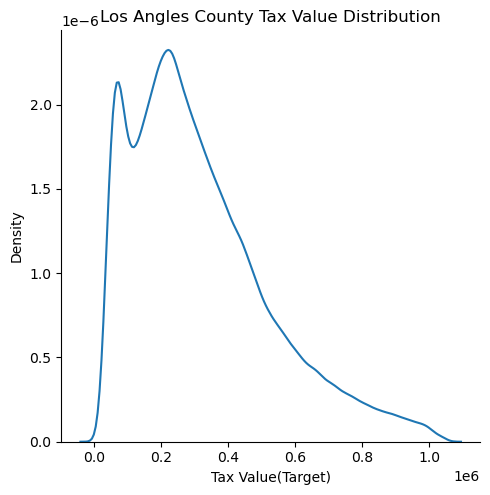

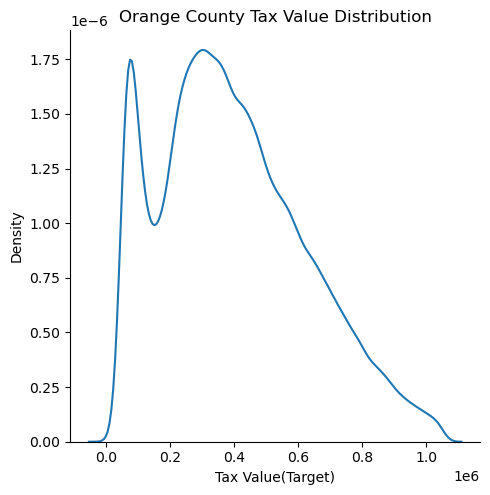

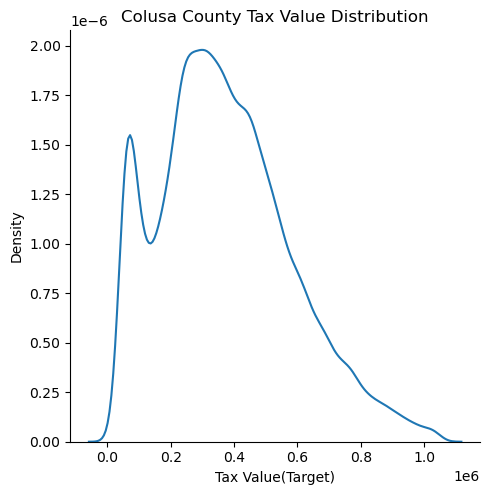

In [75]:
fig, ax = plt.subplots(3, 1, figsize=(16, 11))

ax[0] = sns.displot(la_co, x='tax_value', kind='kde')
plt.title('Los Angles County Tax Value Distribution')
plt.xlabel('Tax Value(Target)')

ax[1] = sns.displot(or_co, x='tax_value', kind='kde')
plt.title('Orange County Tax Value Distribution')
plt.xlabel('Tax Value(Target)')

ax[2] = sns.displot(co_co, x='tax_value', kind='kde')
plt.title('Colusa County Tax Value Distribution')
plt.xlabel('Tax Value(Target)')

plt.show(0)

H$_0$: All three samples have equal variance across the means of tax values.

H$_A$: All three samples have equal variance across the means of tax values.

In [76]:
stat, p = stats.levene(la_co['tax_value'],
             or_co['tax_value'],
             co_co['tax_value'])

In [77]:
if p < α:
    print(f'The p value of {p} is less than alpha so we must reject the null hypothesis and these means have equal variance')

The p value of 0.0 is less than alpha so we must reject the null hypothesis and these means have equal variance


In [79]:
stat, p = stats.f_oneway(la_co['tax_value'],
             or_co['tax_value'],
             co_co['tax_value'])

In [80]:
if p < α:
    print(f'The p value of {p} is less than alpha so we must reject the null hypothesis and with some confidence conclude that the one or more mean across these three counties are different.')

The p value of 0.0 is less than alpha so we must reject the null hypothesis and with some confidence conclude that the one or more mean across these three counties are different.


Text(0.5, 1.0, 'Colusa County Tax Values')

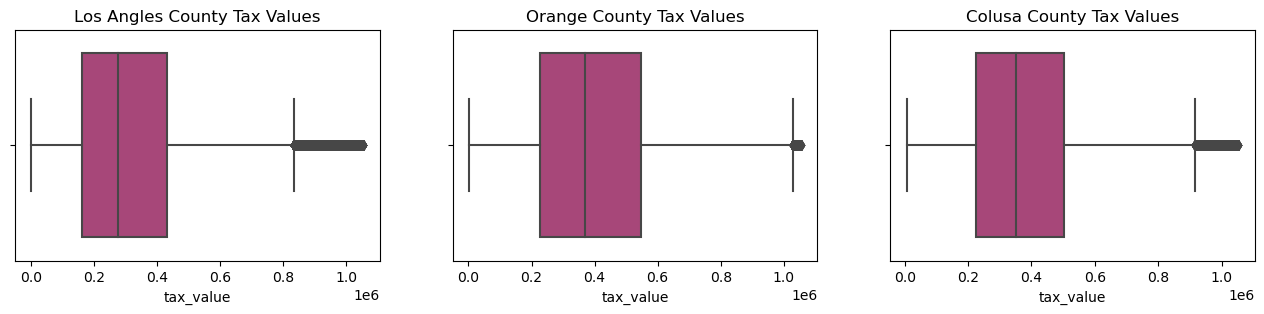

In [95]:
plt.figure(figsize=(16, 3))

plt.subplot(131)
sns.boxplot(la_co['tax_value'], palette='magma')
plt.title('Los Angles County Tax Values')

plt.subplot(132)
sns.boxplot(or_co['tax_value'], palette='magma')
plt.title('Orange County Tax Values')

plt.subplot(133)
sns.boxplot(co_co['tax_value'], palette='magma')
plt.title('Colusa County Tax Values')